<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [7]:
from tensorflow.keras.datasets import reuters

(X_train0, y_train0), (X_test0, y_test0) = reuters.load_data(num_words=None,
                                                             skip_top=0,
                                                             maxlen=None,
                                                             test_split=0.2,
                                                             seed=723812,
                                                             start_char=1,
                                                             oov_char=2,
                                                             index_from=3)

In [8]:
# reshapes y variables
y_train = y_train0.reshape(y_train0.shape[0], 1)
y_test = y_test0.reshape(y_test0.shape[0], 1)

In [176]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [181]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train0, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test0, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)


In [178]:
# checks number of y values to know size of dense output, will be +1 the max because of 0
np.amax(y_train)

45

In [179]:
# creates sequential model
mod1 = Sequential()

mod1.add(Embedding(max_features+1, 256))  # using +1 because of error when value = max value

mod1.add(LSTM(256, dropout=0.2))

mod1.add(Dense(46, activation='softmax'))

In [171]:
# You should only run this cell once your model has been properly configured
mod1.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

print('Train...')
mod1.fit(X_train, 
         y_train,
         batch_size=batch_size,
         epochs=1,)

score, acc = mod1.evaluate(X_test, 
                           y_test,
                           batch_size=batch_size,
                           verbose=0)

print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples
8982/8982 [==============================] - 18s 2ms/sample - loss: 2.0716 - accuracy: 0.4660
Test score: 1.7006271589258795
Test accuracy: 0.5529831


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Pad_sequences changes the length of every sequence to be the same (maxlen) by adding the same value to the start of each sequence to increase it up to the max length. If it is over the max length it is shortened to be at the max length. This is necessary because the sequences are the input to the neural network and they need to all have the same shape.


In [197]:
# x_train pre padding
np.array(X_train0[0])

array([   1,  248,  409,  166,  265, 1537, 1662,    8,   24,    4, 1222,
       2771,    7,  227,  236,   40,   85,  944,   10,  531,  176,    8,
          4,  176, 1613,   24, 1662,  297, 5157,    6,   10,  103,    5,
        231,  215,    8,    7, 2889,    6,   10, 1202,   69,    4, 1222,
        329, 2771,   24,  944,   23,  944, 1662,   40, 2509, 1592,  907,
         69,    4,  113,  997,  762, 2539,    7,  227,  236,   17,   12])

In [198]:
# x train post padding
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,  248,  409,  166,  265, 1537, 1662,    8,   24,
          4, 1222, 2771,    7,  227,  236,   40,   


## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

LTSM networks have an advantage over RNNs because the math involved in LTSM calculations avoids the issue of diminissing gradient. After a certain number of epochs RNNs the gradient values in an RNN for events in the far past will be so small that a computer can interpret it as 0.



## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

1) Text or Speech prediction: They can find paterns in a series of words to predict next word or generate future text that follows a similar patern


2) Finanical predictions: They can *attempt* to predict price changes based on previous paterns of price changes


3) Weather prediction: They can use past weather paterns and current atomspheric conditions to predict weather paterns

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [10]:
!pip install google_images_download

    100% |████████████████████████████████| 911kB 22.5MB/s 
  Stored in directory: /home/seiozi/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [11]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 4, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 1.PKLS4116_inline.png
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 3.PKLS4116.png
Image URL: https://i.pinimg.com/originals/12/ae/e2/12aee2aa186a7b69a66563f138bba822.jpg
Completed Image ====> 4.12aee2aa186a7b69a66563f138bba822.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [101]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
    img_arr = np.array(image.load_img(path=img_path, target_size=(224, 224)))
    expand_image = np.expand_dims(img_arr, axis=0)
    return expand_image

def img_contains_frog(img):
    
    #initiates pretrained model
    resnet = ResNet50(weights='imagenet')
    
    # takes image, predicts and decode predictions
    output = resnet.predict(img)
    preds = decode_predictions(output)
    
    # creates list of if predictions include frog
    frog_names = ['bullfrog', 'tree frog', 'tailed frog']
    has_frog = []
    for pred in preds[0]:
        if pred[1] in frog_names:
            has_frog.append(1)
        else:
            has_frog.append(0)

    # creates message to return if prediction list includes at least one frog
    if 1 in has_frog:
        message = 'There is a frog here'
    else:
        message = 'No frog here'

    return(message)

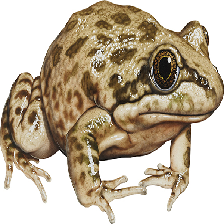

In [125]:
image.load_img('./downloads/animal pond/spotted-grass.jpg', target_size=(224, 224))

In [106]:
# checks known image of frog
img1 = process_img_path('./downloads/animal pond/spotted-grass.jpg')
img_contains_frog(img1)

'There is a frog here'

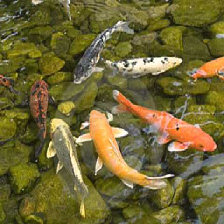

In [126]:
image.load_img('./downloads/animal pond/1.hqdefault.jpg', target_size=(224, 224))

In [121]:
# checks image of not a frog
img1 = process_img_path('./downloads/animal pond/1.hqdefault.jpg')
img_contains_frog(img1)

'No frog here'

#### Displaying Predictions
The next two cells are just to display some of your predictions. You will not be graded on their output. 

In [107]:
import matplotlib.pyplot as plt

def display_predictions(urls):
    image_data = []
    frogs = []
    for url in urls:
        x = process_img_path(url)
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        image_data.append(x)
        frogs.append(img_contains_frog(x))
    
    return image_data, frogs

ValueError: Unsupported image shape: (1, 224, 224, 3)

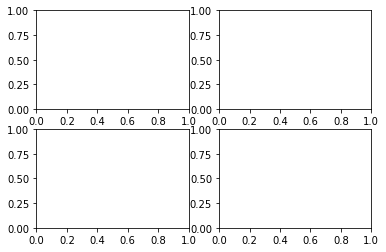

In [108]:
f, axarr = plt.subplots(2,2)

imgs, frogs = display_predictions(absolute_image_paths[0]['animal pond'])

for x,y in [(0,0),(0,1), (1,0), (1,1)]:  
    axarr[x,y].imshow(np.squeeze(imgs[x], axis=0) / 255)
    axarr[x,y].set_title(f"Frog: {frogs[x]}")
    axarr[x,y].axis('off')

<a id="p3"></a>
## Part 3 - Autoencoders

#### Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

Since autoencoders can be good at removing noise from input images, I can see this being uesful for removing noise from pictures such as astronomical imaging. 
When taking telescope images there is almost always some sort of noise. The simplest way to remove it is to take a bias image by taking a picture with a cover over the telescope. This image will only have the noise since there are no stars in the image. Then you can subtract that bias image from the telescope pictures to remove some of the noise. Instead, If you were to have already have some clean telescope pictures you could use those to train an autoencoder, then use new raw photos to remove the noise.


I have also seen articles saying you can use autoencoders to recolor images, I would assume this is done by training the encoder section of the model to remove color, and the decoder section to add the color back, then inputing greyscale images to the decoder and reciving colored images as output.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

    **Right now I feel my strongest DS ability is being able to take a source of data (link, files, website to scrape) and find out which libraries
    are needed to import and format the data, use the documenation to learn the libraries enough to do what is neeeded, and then clean the data.**
    
    **In short, quickly learning important basics of new libraries and clean/formating data**


- What area of Data Science would you most like to learn more about, and why?

   **I am still at the point where I want to be a generalist, I have not found something which has really caught my attention to want to focus on.
   For now I want to just learn more broad topics and try to find something to Focus on**


- Where do you think Data Science will be in 5 years?

    **Genuinly no idea, I still need to get a better understanding of where we are now and the recent history before I could answer this effectivly**


- What are the threats posed by AI to our society?

    Job loss, Weaponized AI errors


- How do you think we can counteract those threats? 

    **To avoid job loss we could regulate AI, but that would put us behind contries which dont regulate AI, so I would propose something like UBI
    for when AI starts displacing jobs faster than people can be trained for the new avialable jobs**
    
    **To avoid weaponized AI from making a mistake we could have trained people to finalize any decision made by AI, which I assume is what we are doing
    but this would be hard to enforce other contries to do**
    

- Do you think achieving General Artifical Intelligence is ever possible?

    **I think It really depends on how much longer moores law is sustainable and how effective quantum computing ends up being
    at some point physics will limit how powerful our computers can be because of the nature of electrons in small spaces. Just looking at the
    computing power required to train some of our simple models the power needed to create a simple AGI might outweigh the usefulness, even if it is possible.
    But if get to the point where can can model the brain more effectivley or find some sort of new way of developing AI different to how it is done now,
    I can see it being a possibility.**


## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [33]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")